In [2]:
#Let's bring in a dataset and look at how we can show comparisons

import warnings
warnings.filterwarnings('ignore')  
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pathlib import Path
file_loc = Path(r'C:\Users\hruss\OneDrive\Documents\GMU\Repositories\CDS303-F22\data')
print(file_loc.is_dir())

True


In [3]:
#This raw dataset will be better for many of the comparison graphs we'll do.
#For now, do not worry about cleaning this one.
df_raw = sns.load_dataset('taxis')
df_raw.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [4]:
#Importing the cleaned dataset as well, just in case.
df_clean = pd.read_csv(file_loc/"Week5_output.csv")
df_clean.head()

,Unnamed: 0,c_yellow,p_credit,t_BronBron,t_BronBroo,t_BronManh,t_BronQuee,t_BrooBron,t_BrooBroo,t_BrooManh,...,d_Quee,d_Stat,pass,dist,fare,tip,tolls,total,p_day,p_hour
0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.043336,0.040268,0.092712,0.0,0.067139,0.833333,0.869565
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.021259,0.026846,0.000000,0.0,0.046104,0.000000,0.695652
2,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.037067,0.043624,0.101768,0.0,0.074112,0.333333,0.739130
3,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.209594,0.174497,0.265201,0.0,0.205452,1.000000,0.043478
4,4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.4,0.058599,0.053691,0.047434,0.0,0.069733,0.833333,0.565217


In [39]:
#Let's bring in our stylesheet too.
#Here's what I need to define my own personal styles. I can save this as a style to call from the matplotlib folder.
#That way, instead of all the stuff that is needed for my_rcParams() being in this file, I would just call plt.style.use(my_rcParams)
#in the my_styleXY function.
axes = {'spines.right' : False,
        'spines.left' : False,
        'grid' : True,
        'grid.axis' : 'y',
        'grid.which' : 'major',
        'titlesize' : 16,
        'titleweight' : 'bold'}
lines = {'markerfacecolor' : 'gray'}
grid = {'color' : 'black',
        'alpha' : 0.1}
figure = {'figsize' : (5,3),
          'titlesize' : 25}
font = {'font.family':'serif',
        'font.style':'italic',
        'font.weight':800}
xtick = {'labelsize' : 5}
ytick = {'labelsize' : 10}

def my_rcParams():
        plt.style.use('default')
        plt.rc('axes', **axes),
        plt.rc('grid', **grid),
        plt.rc('ytick', **ytick),
        plt.rc('figure', **figure),
        plt.rc('lines', **lines),

#You could, in theory, turn this function into a library package, just like any other that you'd install / import.        
def my_styleXY(kind, x, y, nrows, ncols, index, xtext, ytext, suptitle, title, source):
        my_rcParams()
        ax = plt.subplot(nrows, ncols, index)
        if kind == 'bar': sns.barplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'scatter': sns.scatterplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'violin': sns.violinplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'line': sns.lineplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'strip': sns.stripplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'swarm': sns.swarmplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'box': sns.boxplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'boxen': sns.boxenplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'point': sns.pointplot(x = x, y = y, color = 'gray', ax = ax)
        if kind == 'reg': sns.regplot(x = x, y = y, color = 'gray', ax = ax)
        ax.xaxis.set_label_text(xtext)
        ax.yaxis.set_label_text(ytext)
        fig.suptitle(suptitle, x = .15, fontsize = 16, 
                     fontstyle = 'italic', font = 'times new roman', 
                     transform = fig.transFigure, clip_on = False)
        ax.set_title(title, loc = 'left', fontsize = 12, fontstyle = 'italic', font = 'arial')
        ax.text(.04, -.01, source, transform=fig.transFigure, fontsize = 10, alpha = .7)
def my_styleX(kind, x, nrows, ncols, index, xtext, ytext, suptitle, title, source):
        my_rcParams()
        ax = plt.subplot(nrows, ncols, index)
        if kind == 'hist': sns.histplot(x = x, color = 'gray', ax = ax)
        if kind == 'kde': sns.kdeplot(x = x, color = 'gray', ax = ax)
        if kind == 'ecdf': sns.ecdfplot(x = x, color = 'gray', ax = ax)
        if kind == 'rug': sns.rugplot(x = x, color = 'gray', ax = ax)
        if kind == 'count': sns.countplot(x = x, color = 'gray', ax = ax)
        ax.xaxis.set_label_text(xtext)
        ax.yaxis.set_label_text(ytext)
        fig.suptitle(suptitle, x = .15, fontsize = 16, 
                     fontstyle = 'italic', font = 'times new roman', 
                     transform = fig.transFigure, clip_on = False)
        ax.set_title(title, loc = 'left', fontsize = 12, fontstyle = 'italic', font = 'arial')
        ax.text(.04, -.01, source, transform=fig.transFigure, fontsize = 10, alpha = .7)

        #plus: ridge, small multiples, sparklines, heatmap


In [15]:
#Let's see what columns we have in the raw file
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passengers       6433 non-null   int64  
 1   distance         6433 non-null   float64
 2   fare             6433 non-null   float64
 3   tip              6433 non-null   float64
 4   tolls            6433 non-null   float64
 5   total            6433 non-null   float64
 6   color            6433 non-null   object 
 7   payment          6389 non-null   object 
 8   pickup_zone      6407 non-null   object 
 9   dropoff_zone     6388 non-null   object 
 10  pickup_borough   6407 non-null   object 
 11  dropoff_borough  6388 non-null   object 
 12  Pday             6433 non-null   int64  
 13  Pmonth           6433 non-null   int64  
 14  Pyear            6433 non-null   int64  
 15  Phour            6433 non-null   int64  
 16  Dday             6433 non-null   int64  
 17  Dmonth        

In [10]:
'''
Most basically, we compare different categories by their numeric value in this module. In reality, all of
our graphs will be comparing something, but here we're focusing on comparisons across categories.
We can see the categories (labeled 'object'): pickup, dropoff, color, payment, pickup_zone, dropoff_zone,
pickup_borough and dropoff_borough. Actually, pickup and dropoff are dates, not necessarily categories.
Remember we created categories (month, day of week) from the date: we can perform that again on the raw file.
Also, remember that pickup_zone and dropoff_zone had a lot of values, while pickup_borough and dropoff_borough had 
many fewer.
'''
import datetime as dt
from datetime import date
#Now, let's break out the date / time column into day month year hour
#Day of week: Monday = 0, Tuesday = 1, Wednesday = 2, etc.
df_raw['pickup'] = pd.to_datetime(df_raw['pickup'], format = '%Y-%m-%d %H:%M:%S')
df_raw['Pday'] = df_raw['pickup'].dt.weekday
df_raw['Pmonth'] = df_raw['pickup'].dt.month
df_raw['Pyear'] = df_raw['pickup'].dt.year
df_raw['Phour'] = df_raw['pickup'].dt.hour
df_raw['dropoff'] = pd.to_datetime(df_raw['dropoff'], format = '%Y-%m-%d %H:%M:%S')
df_raw['Dday'] = df_raw['dropoff'].dt.weekday
df_raw['Dmonth'] = df_raw['dropoff'].dt.month
df_raw['Dyear'] = df_raw['dropoff'].dt.year
df_raw['Dhour'] = df_raw['dropoff'].dt.hour
df_raw.drop(['pickup', 'dropoff'], inplace = True, axis = 1)

df_raw.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,Pday,Pmonth,Pyear,Phour,Dday,Dmonth,Dyear,Dhour
0,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,5,3,2019,20,5,3,2019,20
1,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0,3,2019,16,0,3,2019,16
2,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2,3,2019,17,2,3,2019,18
3,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,6,3,2019,1,6,3,2019,1
4,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,5,3,2019,13,5,3,2019,13


In [11]:
df_raw.columns

Index(['passengers', 'distance', 'fare', 'tip', 'tolls', 'total', 'color',
       'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough',
       'dropoff_borough', 'Pday', 'Pmonth', 'Pyear', 'Phour', 'Dday', 'Dmonth',
       'Dyear', 'Dhour'],
      dtype='object')

In [ ]:
'''
Let's focus on numeric values passengers, distance, fare, tip
And categorical values payment, pickup_zone, dropoff_zone, pday, phour, dday, dhour
'''

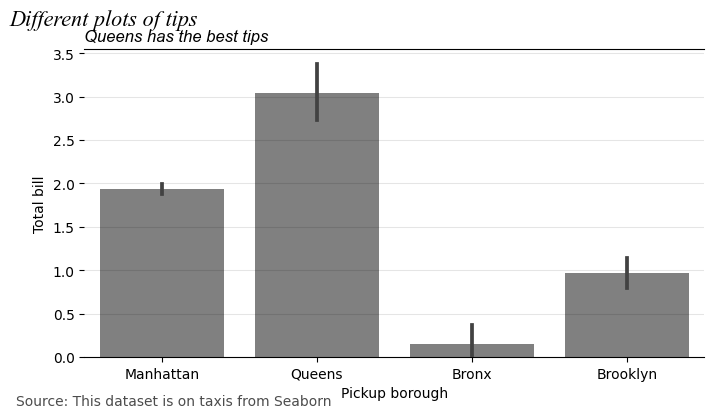

In [24]:
fig = plt.figure(figsize=(8,4))

# We define my_styleXY as follows: (kind (can be bar, scatter, violin), x, y, nrows (in figure), ncols (in figure), index (of subplot in figure), 
# xtext (x axis label), ytext (y axis label), suptitle (overall figure title), title (subplot title), source (where you got the data))
#Let's start with the chart we showed in the demo on stylesheets

my_styleXY('bar', df_raw['pickup_borough'], df_raw['tip'], 1, 1, 1, "Pickup borough",
               "Total bill","Different plots of tips",'Queens has the best tips',
               "Source: This dataset is on taxis from Seaborn")

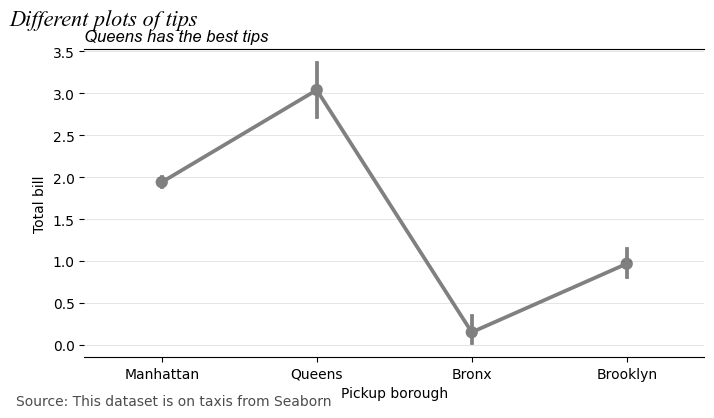

In [38]:
#datavizproject.org (function=comparison): alluvial/sankey/stream, donut/radial/sunburst/radar, treemap/heatmap
#lollipop/dumbell, strip/jitter/violin/boxplot, sparkline 
#Some of these also pertain to trend or other topics.
#passengers, distance, fare, tip vs payment, pickup_zone, dropoff_zone, pday, phour, dday, dhour
#In the way we set up our graph, x = category and y = value
#Graph templates we have for comparison: bar, scatter, violin, line, strip, box, boxen, point

fig = plt.figure(figsize=(8,4))
my_styleXY('point', df_raw['pickup_borough'], df_raw['tip'], 1, 1, 1, "Pickup borough",
               "Total bill","Different plots of tips",'Queens has the best tips',
               "Source: This dataset is on taxis from Seaborn")

In [ ]:
#passengers, distance, fare, tip vs payment, pickup_zone, dropoff_zone, pday, phour, dday, dhour
#Let's try some of the more advanced types of graphs from data viz project (sankey, radial/sunburst, heatmap/treemap, dumbell, sparkline, ridgeplot)

fig = plt.figure(figsize=(8,4))
my_styleXY('point', df_raw['pickup_borough'], df_raw['tip'], 1, 1, 1, "Pickup borough",
               "Total bill","Different plots of tips",'Queens has the best tips',
               "Source: This dataset is on taxis from Seaborn")